In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
# Convert the categorical variable `Species` to numerical values
iris["Species"] = iris["Species"].astype("category").cat.codes

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris)


In [5]:
# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the data
kmeans.fit(scaled_iris)

# Get the cluster labels
cluster_labels = kmeans.labels_


C:\Users\Waleed Chattha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Waleed Chattha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(scaled_iris, cluster_labels)


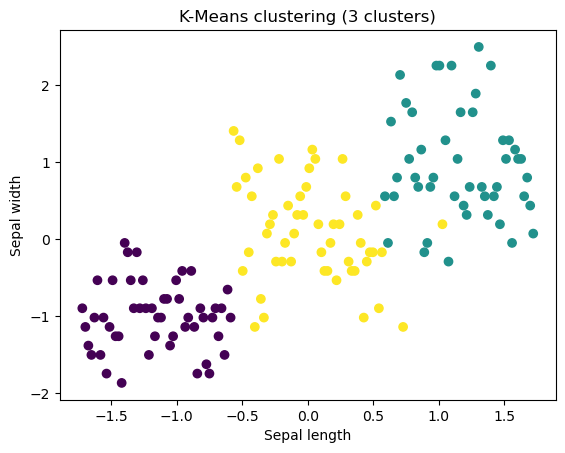

In [7]:
plt.scatter(scaled_iris[:, 0], scaled_iris[:, 1], c=cluster_labels)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("K-Means clustering (3 clusters)")
plt.show()


In [8]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_iris)
    wcss.append(kmeans.inertia_)


C:\Users\Waleed Chattha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Waleed Chattha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Waleed Chattha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Waleed Chattha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

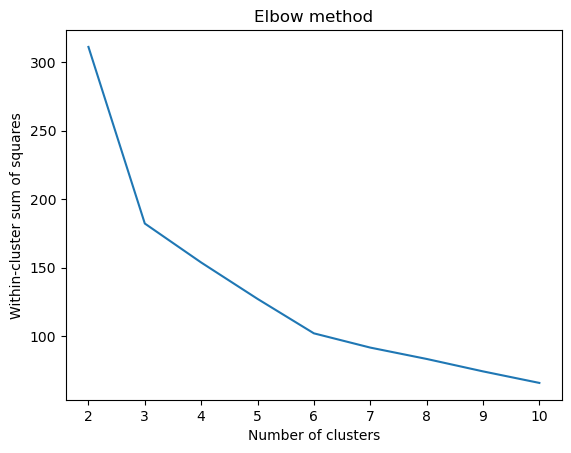

In [9]:
plt.plot(range(2, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.title("Elbow method")
plt.show()
